# Measures of Dispersion

## Objectives ##
- Perform descriptive data analysis on collected data including calculation and interpretation of measures of central tendency, measures of variation, measures of position, detection of outliers, and applying the Empirical Rule to bell-shaped data.
- Estimate population parameters using both point estimates and confdence interval estimates using both the normal and Student $t$-distribution.
- Analyze an application in the disciplines business, social sciences, psychology, life sciences, health science, and education, and utilize the correct statistical processes to arrive at a solution.

## The Standard Deviation ##
An important characteristic of any set of data is the variation in the data. In some data sets, the data values are concentrated closely near the mean; in other data sets, the data values are more widely spread out from the mean. The most common measure of variation, or spread, is the standard deviation. The **standard deviation** is a number that measures the average distance of data values from their mean.

Because distance is never a negative value, the standard deviation is always positive or zero. The standard deviation is small when the data are all concentrated close to the mean, exhibiting little variation or spread. The standard deviation is larger when the data values are more spread out from the mean, exhibiting more variation.

Suppose that we are studying the amount of time customers wait in line at the checkout at supermarket A and supermarket B. the average wait time at both supermarkets is five minutes. At supermarket A, the standard deviation for the wait time is two minutes; at supermarket B the standard deviation for the wait time is four minutes.

Because supermarket B has a higher standard deviation, we know that there is more variation in the wait times at supermarket B. Overall, wait times at supermarket B are more spread out from the mean; wait times at supermarket A are more concentrated near the mean.



A data value that is  more than two standard deviations from the average is considered by many statisticians to be an **outlier**—it deviates from the average much greater than the standard amount for the data. Considering data to be an outlier if it is more than two standard deviations away is more of an approximate "rule of thumb" than a rigid rule. In general, the shape of the distribution of the data affects how much of the data is further away than two standard deviations. (You will learn more about this in later chapters.)

In [18]:
png("sd_example.png", width = 1000, height = 1000)

library("beeswarm")

rangebrace = function(x, y0, y1, d, col){
    X = seq(x, x-d, length = 500)
    Ytop = (y1 - y0)/4 * ( (2/d)^(1/3) * sign(X - (x - d/2))*abs(X - (x - d/2))^(1/3) + 1 ) + (y0 + y1)/2
    Ybot = (y1 - y0)/4 * ( -(2/d)^(1/3) * sign(X - (x - d/2))*abs(X - (x - d/2))^(1/3) - 1 ) + (y0 + y1)/2
    lines(X, Ytop, lwd = 3, col = col)
    lines(X, Ybot, lwd = 3, col = col)
}

rangebar = function(x, y0, y1, d, col){
    segments(x-d, y0, x+d, y0, lwd = 3, col = col)
    segments(x, y0, x, y1, lwd = 3, col = col)
    segments(x-d, y1, x+d, y1, lwd = 3, col = col)
}

x1 = rnorm(100, mean = 3, sd = 1.5)
x2 = rnorm(100, mean = -1, sd = 3.5)

par(mar = c(2, 3.5, 2, 0))
beeswarm(x = list(x1, x2), pch = 21, col = "black", bg = "gray70", 
         cex = 2.5, cex.axis = 2, cex.main = 2, main = "The Standard Deviations of Two Data Sets", xlim = c(0.4, 2.4), xaxt = "n", yaxt = "n")
axis(1, at = c(1, 2), labels = c("Data Set 1", "Data Set 2"), cex.axis = 2)
axis(2, at = seq(floor(min(c(x1), c(x2))), ceiling(max(c(x1),c(x2))), 1), cex.axis = 2, las = 2)

d = 0.2

segments(1.0 - d, mean(x1), 1.0 + d, mean(x1), lwd = 4, lty = "dotted", col = "blue3")
segments(2.0 - d, mean(x2), 2.0 + d, mean(x2), lwd = 4, lty = "dotted", col = "blue3")

text(x = 1.0 + d, y = mean(x1), labels = "Mean\nData Set 1", cex = 2, col = "blue3", pos = 4)
text(x = 2.0 + d, y = mean(x2), labels = "Mean\nData Set 2", cex = 2, col = "blue3", pos = 4)

eps = 0.05
rangebar(x = 1.0 - d, y0 = mean(x1) + eps, y1 = mean(x1) + sd(x1), d = 0.02, col = "red3")
rangebar(x = 1.0 - d, y0 = mean(x1) - sd(x1), y1 = mean(x1) - eps, d = 0.02, col = "red3")
rangebar(x = 2.0 - d, y0 = mean(x2) + eps, y1 = mean(x2) + sd(x2), d = 0.02, col = "red3")
rangebar(x = 2.0 - d, y0 = mean(x2) - sd(x2), y1 = mean(x2) - eps, d = 0.02, col = "red3")

text(x = 1.0-d, y = mean(x1) + 0.5*sd(x1), labels = "Standard Deviation\nData Set 1", cex = 2, col = "red3", pos = 2)
text(x = 1.0-d, y = mean(x1) - 0.5*sd(x1), labels = "Standard Deviation\nData Set 1", cex = 2, col = "red3", pos = 2)
text(x = 2.0-d, y = mean(x2) - 0.5*sd(x2), labels = "Standard Deviation\nData Set 2", cex = 2, col = "red3", pos = 2)
text(x = 2.0-d, y = mean(x2) + 0.5*sd(x2), labels = "Standard Deviation\nData Set 2", cex = 2, col = "red3", pos = 2)


dev.off()

png 
  2

```{figure} sd_example.png
---
width: 100%
alt: Two data sets side-by-side. The first data set has data more squashed close to the mean and a small standard deviation. The second data set has data more spread out from the mean and a larger standard deviation.
name: sd-example
---
The standard deviation is a measure of the average distance of data values from their mean. If we compare the two data sets in the figure, the values of data set 1 are squashed closer to the mean, so data set 1 has a smaller standard deviation. The values of data set 2 are more spread out from the mean, so data set 2 has a larger standard deviation. Since standard deviation is a measure of the average distance, and the measure of a distance doesn't include a direction, standard deviation doesn't have a direction, either. This is why each data set in the figure has two standard deviation bars: one for each direction away from the mean.
```

## Calculating the Population Standard Deviation

We will first look at calculating the standard deviation for a population. If $x$ is a data value, then the difference "$x – \text{mean}$" is called its **deviation**; it's a measure of the distance from the value $x$ to the mean of the data. In a data set, there are as many deviations as there are items in the data set. The deviations are used to calculate the standard deviation. If the numbers belong to a population, in symbols a deviation is $x – \mu$.

For example, suppose a population has mean $\mu = 5$, and consider two data values of the population: $x = 2$ and $x = 8$. The deviation of the value $x = 2$ from the mean is 

$$x - \mu = 2 - 5 = -3.$$ 

The deviation of the value $x = 8$ from the mean is 

$$x - \mu = 8 - 5 = 3.$$

Both $x = 2$ and $x = 8$ are a distance of $3$ units away from $\mu = 5$. But the signs (positives or negatives) of the deviations also tell us direction: since the deviation of $x = 2$ is $-3$, $x = 2$ is $3$ units *below* the mean; since the deviation of $x = 8$ is $+3$, $x = 8$ is $3$ units *above* the mean.

When calculating the standard deviation, we want to only focus on the average distance from the mean, not the direction. To remove the information on direction (the sign) from each deviation, we square each deviation. For $x = 2$, the squared deviation is

$$ (x - \mu)^2 = (2 - 5)^2 = (-3)^2 = 9. $$

For $x = 8$, the squared deviation is

$$ (x - \mu)^2 = (8 - 5)^2 = 3^2 = 9. $$

Since squaring a deviation always results in a positive number, it removes the information on direction. Unfortunately, squared deviations tell us the *square* of the distance of each value from the mean, not simply the distance. We will correct this problem later.

Next, we find the mean of all the squared deviations in the usual way: by adding up all the squared deviations in the population and dividing by the population size $N$:

$$ \frac{\sum(x - \mu)^2}{N}. $$

This is the average *squared* distance of the population data from the mean. We need to "unsquare" the average by taking the square root. This gives us the formula for the population standard deviation:

$$ \sigma = \sqrt{\frac{\sum(x - \mu)^2}{N}}.$$

We denote the population standard deviation by $\sigma$ (the lower-case Greek letter sigma).

Note that to calculate the population standard deviation $\sigma$, we first must calculate the population mean $\mu$ since we use $\mu$ in the formula for $\sigma$. 

Also, to use the formula for population standard deviation in R, we will need to know how to take a square root in R. We can take the square root of a value in R using the <code>sqrt</code> function:

```R
sqrt(x)
```

where <code>x</code> is a number of list of numbers. For example,

In [19]:
sqrt(4)

[1] 2

***

### Example

The Cook Political Report scores the partisan lean of each state based on the results of recent elections. The Partisan Voting Index (PVI) for each of the 50 states (as of April 2021) is below, where more negative values means the state is more Democratic leaning, and more positive values means the state is more Republican leaning.[^attribution]

<center>
    15, 9, 3, 16, -14, -3, -7, -6, 3, 3, -15, 19, -7, 11, 6, 11, 16, 12, -1, -14, -14, 1, -1, 10, 11, 11, 13, 0, 0, -6, -3, -10, 3, 20, 6, 20, -6, 2, -8, 8, 16, 14, 5, 13, -15, -2, -8, 23, 2, 26
</center>
<br/>

1. Calculate the mean state PVI.
2. Calculate the standard deviation of the state PVIs.

[^attribution]: Wasserman, David; Flinn, Ally (April 15, 2021). "[Introducing the 2021 Cook Political Report Partisan Voter Index](https://cookpolitical.com/analysis/national/pvi/introducing-2021-cook-political-report-partisan-voter-index)". The Cook Political Report. Retrieved April 15, 2021.


#### Solution
Note that this list includes the PVIs for the entire *population* of 50 states, so we will be calculating the *population* mean and the *population* standard deviation.

##### Part 1

In [22]:
x = c(15, 9, 3, 16, -14, -3, -7, -6, 3, 3, -15, 19, -7, 11, 6, 11, 16, 12, -1, -14, -14, 1, -1, 10, 11, 11, 13, 0, 0, -6, -3, -10, 3, 20, 6, 20, -6, 2, -8, 8, 16, 14, 5, 13, -15, -2, -8, 23, 2, 26)

# Calculate the Mean
N = length(x)

mu = sum(x)/N
mu

[1] 3.76

The mean PVI is $\mu = 3.76$. This means that states on average lean Republican.

##### Part 2

In [23]:
# Calculate the Standard Deviation
sigma = sqrt( sum( (x - mu)^2 )/N )
sigma

[1] 10.67438

The standard deviation of the state PVIs is $\sigma = 10.6744$. On average, state PVIs differ from the mean by $10.6744$ points.

```{note}
Be careful that you don't interpret the mean state PVI that we calculated above to be the same as the PVI for the whole United States. Many Democratic leaning states have much larger populations than Republican leaning states, but we didn't account for population differences in our analysis. For example, California (with a PVI of -14) has 68.5 times the population of Wyoming (with a PVI of 26), but both states were treated equally in our calculations above. The lesson: we must be very careful not to misinterpret or over-interpret data.
```

***

## Calculating the Standard Deviation ##
If $x$ is a data value, then the difference "$x – \text{mean}$" is called its **deviation**; it's a measure of how far the value $x$ is away from the mean of the data. In a data set, there are as many deviations as there are items in the data set. The deviations are used to calculate the standard deviation. If the numbers belong to a population, in symbols a deviation is $x – \mu$. For sample data, in symbols a deviation is $x – \bar{x}$.

The procedure to calculate the standard deviation depends on whether the numbers are the entire population or are data from a sample. The calculations are similar, but not identical. Therefore the symbol used to represent the standard deviation depends on whether it is calculated from a population or a sample. The lower case letter $s$ represents the sample standard deviation and the Greek letter $\sigma$ (sigma, lower case) represents the population standard deviation. If the sample has the same characteristics as the population, then $s$ should be a good estimate of $\sigma$.

To calculate the standard deviation, we need to calculate the variance first. The **variance** is the average of the squares of the deviations (the $x – \bar{x}$ values for a sample, or the $x - \mu$ values for a population). The symbol $\sigma^2$ represents the population variance; the population standard deviation $\sigma$ is the square root of the population variance. The symbol $s^2$ represents the sample variance; the sample standard deviation $s$ is the square root of the sample variance. You can think of the standard deviation as a special average of the deviations.

If the numbers come from a census of the entire **population** and not a sample, when we calculate the average of the squared deviations to find the variance, we divide by $N$, the number of items in the population. If the data are from a **sample** rather than a population, when we calculate the average of the squared deviations, we divide by $n – 1$, one less than the number of items in the sample.

**Formula for the Sample Standard Deviation:**
$$ s = \sqrt{\frac{\sum(x - \bar{x})^2}{n - 1}} $$
Here, $x$ is a data value in our sample, $\bar{x}$ is the sample mean, and $n$ is the sample size. Remember, the $\sum$ symbol means addition. In this case, we want to add up all the squared deviations $(x - \bar{x})^2$ for each $x$ in our data.

**Formula for the Population Standard Deviation:**
$$ \sigma = \sqrt{\frac{\sum(x - \mu)^2}{N}} $$
Here, $x$ is a data value in our population, $\mu$ is the population mean, and $N$ is the population size.

Notice that, despite the differences of notation, the formulas are *almost* the same. The most significant difference is that the when calculating the sample standard deviation, we divide the sum of the squared deviations by the number of data values *minus 1*. When calculating the population standard deviation, we divide the sum of the squared deviation by simply the number of data values.

Note also that the mean is a part of the formulas for standard deviation. In order to calculate the standard deviation, we must first calculate the mean.

In practice, statisticians usually deal with data from a sample, not data from an entire population. It is often impractical to collect data on an entire population, so we study a smaller sample of the population to gain insights into the population as a whole. As such, statisticians usually use the formula for the sample standard deviation.

***


### Example 3.1 ###
A doctor checks the resting heart rate of 5 of his patients. Their resting heart rates, in beats-per-minute, are

70, 73, 94, 62, 81
    
1. Calculate the sample mean.
2. Calculate the sample standard deviation.


#### Solution ####
##### Part 1 #####
We use R to calculate the mean.

In [1]:
beats = c(70, 73, 94, 62, 81)

# Calculate the Sample Mean
n = length(beats)

xbar = sum(beats)/n
xbar

[1] 76

The sample mean is $\bar{x} = 76$ beats-per-minute.

##### Part 2 #####
Once we have the mean, we are ready to calculate the standard deviation. This calculation is more complicated than the calculations we've done so far. We'll first present the solution in its entirety, then explain what we did line by line.

In [2]:
# Calculate the Sample Standard Deviation
s = sqrt( sum( (beats - xbar)^2 ) / (n - 1) )
s

[1] 12.14496

The sample standard deviation is $s = 12.145$.


<br><br>
Now let's explain what we did. Remember, we want to calculate the sample standard deviation $s$ using the formula
$$ s = \sqrt{\frac{\sum(x - \bar{x})^2}{n - 1}}.$$

To calculate this formula, we first must find the deviation
$$ x - \bar{x}$$
for *every* data value $x$. Since we stored our list of data values in <code>beats</code>, we just need to subtract the sample mean, stored in <code>xbar</code>, from each data value in <code>beats</code>, as we did in the first line above:

In [3]:
beats - xbar

[1]  -6  -3  18 -14   5

Note that what we get are the deviations *for each data value*. For example, for our first data value of 70, the deviation is
$$ x - \bar{x} = 70 - 76 = -6, $$
which is the first value in our resulting list.

<br><br>
But note in the formula that we *square* each deviation:
$$ (x - \bar{x})^2 $$
So we take our list of deviations and square all the values in that list:

In [4]:
(beats - xbar)^2

[1]  36   9 324 196  25

Again, double check that we are indeed getting our deviation values squared. For our first data value, the deviation was -6. When we square that, we get
$$ (x - \bar{x})^2 = (-6)^2 = 36, $$
which matches the first entry in our resulting list.

<br><br>
Once we have the list of squared deviations, we want to add together the values in the list to get
$$ \sum (x - \bar{x})^2 $$

In [5]:
sum( (beats - xbar)^2 )

[1] 590

So 
$$\sum (x - \bar{x})^2 = 36 + 9 + 324 + 196 + 25 = 590.$$
This is the numerator of the fraction in our formula.

<br><br>
Then our next step is to divide by the denominator:
$$ \frac{\sum (x - \bar{x})^2}{n - 1} $$
This is simple to do in R.

In [6]:
sum( (beats - xbar)^2 )/(n - 1)

[1] 147.5

Recall from above that we call this quantity the **variance** of the data. We denote it mathematically as $s^2$, the square of the standard deviation.

<br><br>
The only thing left to do is take the square root of the variance:
$$ s = \sqrt{\frac{\sum(x - \bar{x})^2}{n - 1}} $$
To do so, we use the <code>sqrt</code> function:
```R
sqrt(x)
```
Here, <code>x</code> is a number or a list of numbers. 

Using the <code>sqrt</code> function, we find the standard deviation $s$.

In [7]:
s = sqrt( sum( (beats - xbar)^2 )/ (n-1) )
s

[1] 12.14496

***


### Example 2.3.2 ###
Use the following data (first exam scores) from Susan Dean's spring pre-calculus class:

33, 42, 49, 49, 53, 55, 55, 61, 63, 67, 68, 68, 69, 69, 72, 73, 74, 78, 80, 83, 88, 88, 88, 90, 92, 94, 94, 94, 94, 96, 100

1. Calculate the sample mean.
2. Calculate the sample standard deviation.
3. Are there any outliers in the data?

#### Solution ####
##### Part 1 #####

In [1]:
scores = c(33, 42, 49, 49, 53, 55, 55, 61, 63, 67, 68, 68, 69, 69, 72, 73, 74, 78, 80, 83, 88, 88, 88, 90, 92, 94, 94, 94, 94, 96, 100)

# Calculate the Sample Mean
n = length(scores)

xbar = sum(scores)/n
xbar

[1] 73.51613

The mean score is $\bar{x} = 73.51613$.

##### Part 2 #####

In [2]:
# Calculate the Sample Standard Deviation
s = sqrt( sum( (scores - xbar)^2 ) / (n - 1) )
s

[1] 17.92367

So the standard deviation of the scores is $s = 17.924$.

#### Part 3 ####
Recall that we consider a data value to be an outlier if it is more than two standard deviations away from the mean. Two standard deviations above the mean is
$$ \bar{x} + 2s = 73.516 + 2(17.924) = 109.364 $$
and two standard deviations below the mean is
$$ \bar{x} - 2s = 73.516 - 2(17.924) = 37.668. $$
The maximum value in our data is 100, which is not as far away from the mean as 109.364. So there are no outliers above the mean. But the minimum value of 33 is less than 37.668, meaning 33 is more than two standard deviations below the mean.

So 33 is an outlier.

***


### Example 2.3.3 ###
In a fifth grade class, the teacher was interested in the average age and the population standard deviation of the ages of her students. The following data are the ages for all N = 20 fifth grade students in her class. The ages are rounded to the nearest half year:

9, 9.5, 9.5, 10, 10, 10, 10, 10.5, 10.5, 10.5, 10.5, 11, 11, 11, 11, 11, 11, 11.5, 11.5, 11.5

1. Find the population mean.
2. Find the population standard deviation.
3. Construct a box plot of the data.
4. Using the population standard deviation and the box plot, comment on the spread of the data.

#### Solution ####
Note that since we have data on the entire class, we are calculating data for an entire population, not a sample.
##### Part 1 #####

In [1]:
ages = c(9, 9.5, 9.5, 10, 10, 10, 10, 10.5, 10.5, 10.5, 10.5, 11, 11, 11, 11, 11, 11, 11.5, 11.5, 11.5)

# Calculate the Population Mean
N = length(ages)

mu = sum(ages)/N
mu


[1] 10.525

The population mean is $\mu = 10.525$.

##### Part 2 #####
When calculating the *population* standard deviation, be sure to use the correct formula.

In [2]:
# Calculate the Population Standard Deviation
sigma = sqrt( sum( (ages - mu)^2 ) / N)
sigma

[1] 0.6977643

The population standard deviation is $\sigma = 0.6977643$.

##### Part 3 #####

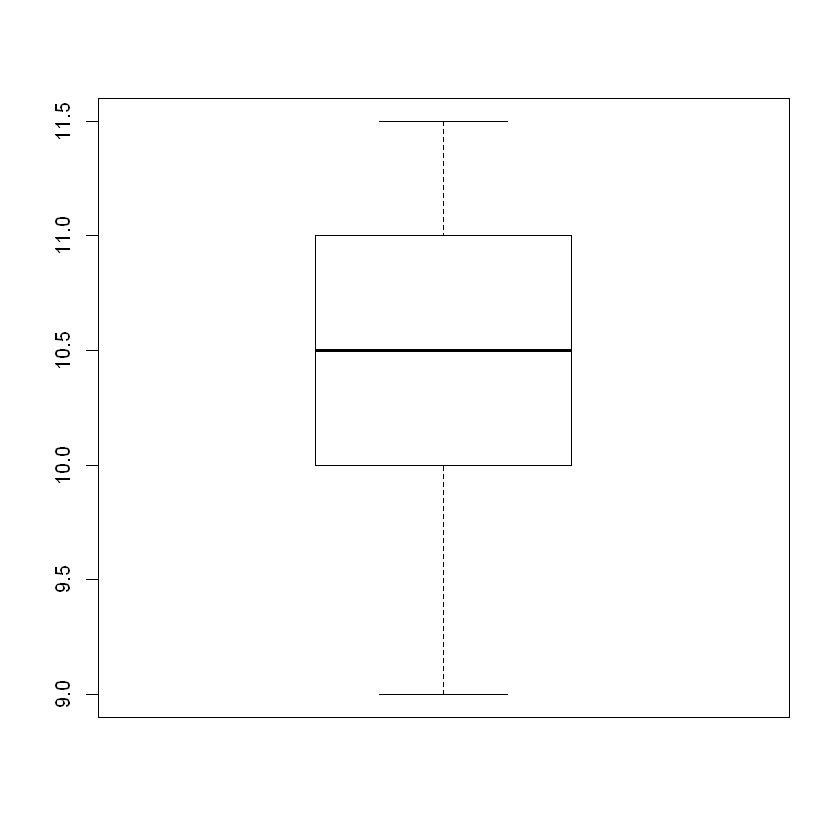

In [3]:
boxplot(ages)

##### Part 4 #####
From the box plot, we can see that the bottom whisker extends further than any other region. This means the data is the most spread out in this region. If we were able to omit the smallest value or values in our data, this region would be less spread out, and the standard deviation would be smaller.

***

### Example 3.4

In [ ]:
#**VID=jP7PPzsJYkg**#

***

<small style="color:gray"><b>License:</b> This work is licensed under a [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license.</small>

<small style="color:gray"><b>Author:</b> Taylor Baldwin, Mt. San Jacinto College</small>

<small style="color:gray"><b>Adapted From:</b> <i>Introductory Statistics</i>, by Barbara Illowsky and Susan Dean. Access for free at [https://openstax.org/books/introductory-statistics/pages/1-introduction](https://openstax.org/books/introductory-statistics/pages/1-introduction).</small>